In [4]:
import pandas as pd
import numpy as np

In [2]:
!pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 342.5 kB/s eta 0:00:03
   --------------- ------------------------ 0.5/1.4 MB 342.5 kB/s eta 0:00:03
   --------------- ------------------------ 0.5/1.4 MB 342.5 kB/s eta 0:00:03
   --------------- ------------------------ 0.5/1.4 MB 342.5 kB/s eta 0:00:03
   ----------------------- ---------------- 0.8/1.4 MB 315.4 kB/s eta 0:00:02
   ----------------------- ---------------- 0.8/1.4 MB 315.4 kB/s eta 0:00:02
   ----------------------- ---------------- 0.8/1.4 MB 315.4 kB/s eta 0:00:02
   ----------------------- -------------

In [3]:
from mlxtend.preprocessing import TransactionEncoder


In [5]:

file_path = "Online retail.xlsx"   
df = pd.read_excel(file_path)

# Preview
df.head()


,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [6]:

df.dropna(inplace=True)


df.drop_duplicates(inplace=True)


transactions = df.iloc[:,0].apply(lambda x: x.split(',')).tolist()

print("Total Transactions:", len(transactions))
print(transactions[:5])


Total Transactions: 5175
[['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt']]


In [7]:

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

df_encoded = pd.DataFrame(te_array, columns=te.columns_)
df_encoded.head()


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
from mlxtend.frequent_patterns import apriori, association_rules

In [9]:

# Remove missing values
df.dropna(inplace=True)


df.drop_duplicates(inplace=True)


transactions = df.iloc[:,0].apply(lambda x: x.split(',')).tolist()

print("Total Transactions:", len(transactions))
print(transactions[:5])


Total Transactions: 5175
[['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt']]


In [10]:
# Step 4: Transaction Encoding (One-Hot)
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

df_encoded = pd.DataFrame(te_array, columns=te.columns_)
df_encoded.head()


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:

frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)

print("Frequent Itemsets:")
frequent_itemsets.head()


Frequent Itemsets:


,support,itemsets
0,0.029179,(almonds)
1,0.045797,(avocado)
2,0.020483,(black tea)
3,0.045024,(brownies)
4,0.113816,(burgers)


In [12]:

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)


rules = rules[(rules['support'] >= 0.02) & (rules['confidence'] >= 0.3) & (rules['lift'] >= 1.2)]

rules.sort_values(by="lift", ascending=False, inplace=True)


rules.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
123,(herb & pepper),(ground beef),0.066473,0.135845,0.022802,0.343023,2.525100,1.0,0.013772,1.315350,0.646983,0.127018,0.239746,0.255438
206,"(ground beef, mineral water)",(spaghetti),0.058744,0.229565,0.024734,0.421053,1.834131,1.0,0.011249,1.330751,0.483166,0.093842,0.248545,0.264398
132,(ground beef),(spaghetti),0.135845,0.229565,0.055845,0.411095,1.790756,1.0,0.024660,1.308250,0.510993,0.180400,0.235620,0.327181
151,(soup),(milk),0.070918,0.170048,0.021449,0.302452,1.778626,1.0,0.009390,1.189814,0.471184,0.097711,0.159532,0.214294
173,(olive oil),(spaghetti),0.087536,0.229565,0.032464,0.370861,1.615493,1.0,0.012368,1.224586,0.417544,0.114053,0.183397,0.256138
163,(soup),(mineral water),0.070918,0.299710,0.033430,0.471390,1.572818,1.0,0.012175,1.324775,0.391998,0.099140,0.245155,0.291465
3,(burgers),(eggs),0.113816,0.208116,0.036135,0.317487,1.525531,1.0,0.012448,1.160248,0.388735,0.126437,0.138115,0.245559
137,(herb & pepper),(spaghetti),0.066473,0.229565,0.023188,0.348837,1.519556,1.0,0.007928,1.183168,0.366260,0.084986,0.154811,0.224924
210,"(milk, spaghetti)",(mineral water),0.050048,0.299710,0.022609,0.451737,1.507248,1.0,0.007609,1.277289,0.354270,0.069108,0.217092,0.263586
187,"(milk, chocolate)",(mineral water),0.044831,0.299710,0.020097,0.448276,1.495698,1.0,0.006660,1.269275,0.346971,0.061942,0.212149,0.257665


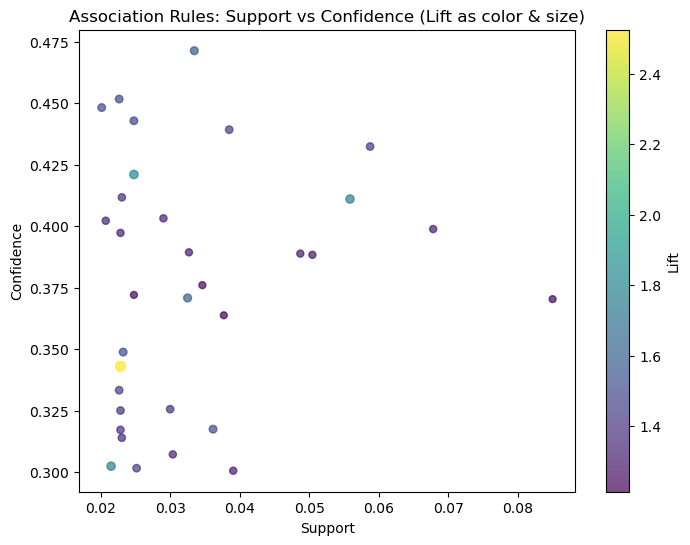

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(rules['support'], rules['confidence'], 
            alpha=0.7, s=rules['lift']*20, c=rules['lift'], cmap='viridis')

plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence (Lift as color & size)')
plt.show()


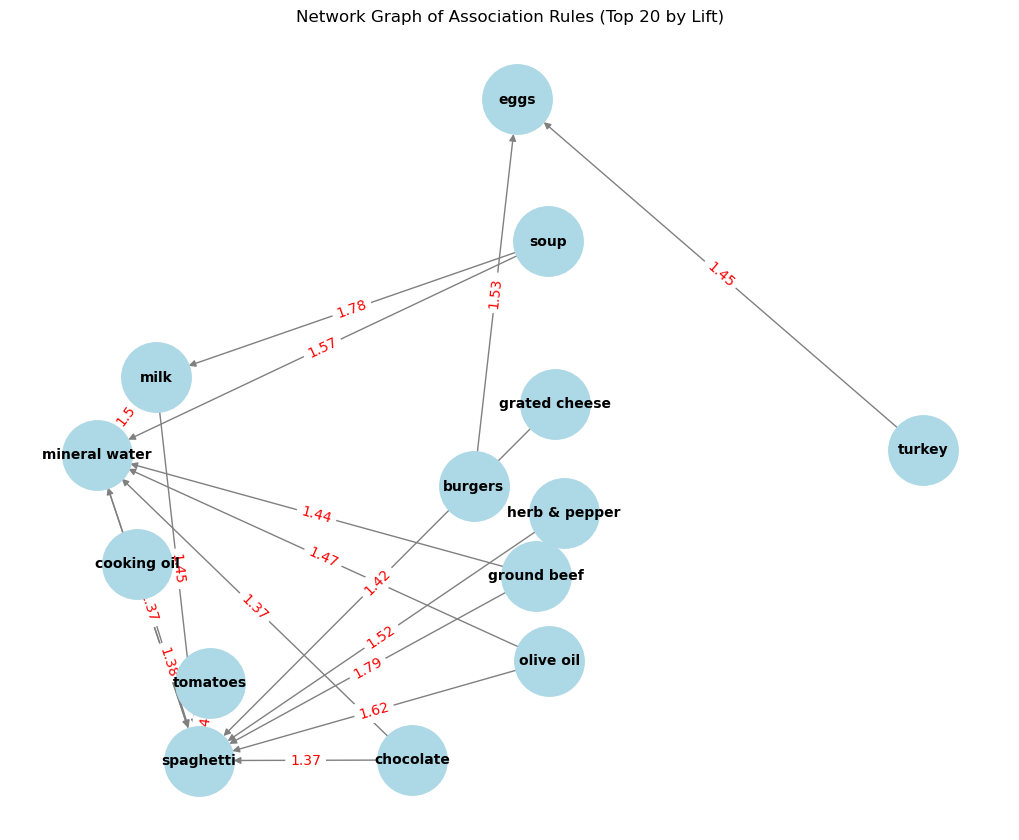

In [14]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add edges for top rules (to avoid clutter, we’ll take top 20 by lift)
top_rules = rules.sort_values('lift', ascending=False).head(20)

for _, row in top_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

# Draw the graph
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, k=1, seed=42)  # layout for clarity
nx.draw(G, pos, with_labels=True, node_size=2500, node_color="lightblue", 
        font_size=10, font_weight="bold", edge_color="gray")

# Draw edge labels (Lift values)
edge_labels = {(u,v): round(d['weight'],2) for u,v,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

plt.title("Network Graph of Association Rules (Top 20 by Lift)")
plt.show()


Interview question


In [ ]:
Corrects for popularity bias:

Popular products (e.g., milk, bread) might appear in many rules just because they are common, not because they are strongly related.

Lift adjusts for this and highlights true associations.

Identifies meaningful rules:

A high-confidence rule might still be trivial if the consequent is a very common item.

Lift ensures the rule reflects a non-random, interesting relationship.

Support refers to how frequently an itemset appears in the dataset. For example, if a dataset has 1,000 transactions and 200 of them include both milk and bread, then the support for the rule {Milk → Bread} is 200 ÷ 1000 = 0.20 (20%). This means that 20% of all transactions contain both items. Support helps us filter out rules that are too rare to be meaningful.

Confidence, on the other hand, measures the reliability of an association rule. It tells us how often item B is purchased when item A is already purchased. Using the same example, if 250 transactions contain milk, and 200 of these also contain bread, then the confidence of the rule {Milk → Bread} is 200 ÷ 250 = 0.80 (80%). This means that when customers buy milk, there is an 80% chance that they also buy bread.

Although association rule mining is a powerful technique for uncovering patterns in transactional data, it comes with several challenges. One limitation is the generation of an overwhelming number of rules, many of which may be trivial, redundant, or uninteresting, making it difficult to identify the truly valuable insights. Another challenge is setting appropriate thresholds for support, confidence, and lift — if the thresholds are too high, important rules may be missed, while too low thresholds may produce too many insignificant rules. Association rules also tend to be biased toward frequent items; common products like “milk” or “bread” often appear in rules simply because they are popular, not because they have strong relationships with other products. Additionally, association rule mining struggles with scalability in very large datasets, as the search space of possible item combinations grows exponentially. Finally, the technique mainly captures correlations rather than causation, meaning a discovered rule does not necessarily imply that one product causes the purchase of another, which can limit its direct business application without further validation.